In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from statistics import mean
import numpy as np

text_size = 13

### Honest Majority Protocols -- QP

{'atlas': [2.20918, 2.17451, 2.19653, 2.18536, 2.24372, 2.17108], 'brain': [2.7533, 2.68012, 2.78484, 2.76206, 2.73347, 2.80813], 'mal-rep-field': [1.78701, 1.71959, 1.77133, 1.52588, 1.78693, 1.85827], 'mal-rep-ring': [1.43088, 1.47101, 1.50182, 1.48031, 1.48707, 1.70875, 1.52887], 'mal-shamir': [1.77514, 1.78855, 1.78928, 1.81595, 1.80684, 1.78518, 1.80994, 1.85574, 1.8641, 1.78668], 'ps-rep-field': [2.40343, 2.53667, 2.52034, 2.52491, 2.46298, 2.45948], 'ps-rep-ring': [2.88178, 2.72825, 2.81462, 2.74814, 2.92858, 2.72333, 2.75699, 2.61267], 'rep-field': [0.68708, 0.61851, 0.81658, 1.08419, 0.66205, 1.17899, 1.15374, 1.12729, 0.69575], 'ring': [1.10485, 1.91343, 1.15107, 1.10596, 1.69571, 1.14544, 1.69276, 1.11383, 1.09549], 'shamir': [1.3494, 1.30204, 1.31918, 1.37517, 1.30556, 1.31335, 1.28526], 'sy-rep-field': [2.85185, 2.8899, 2.74443, 2.80324, 2.91094, 2.79043, 2.84357], 'sy-rep-ring': [5.96598, 5.67502, 5.80165, 5.89183, 5.89077, 5.44674, 5.37412], 'sy-shamir': [5.38638, 5.3206

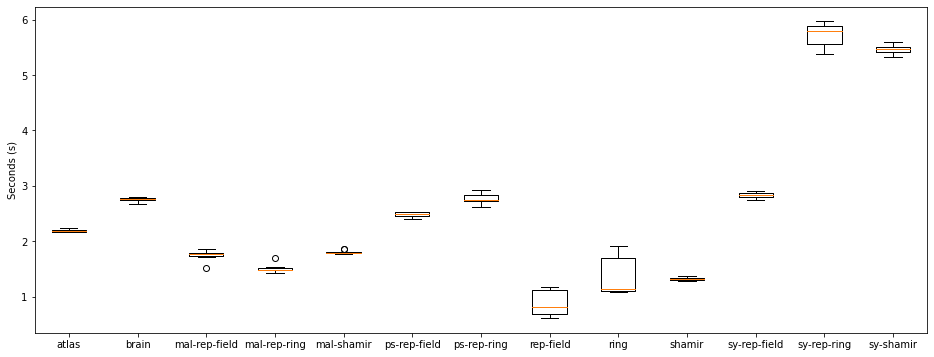

In [75]:
protocols = sorted(['brain','ps\nrep-ring','sy-rep-ring','ps\nrep-field','sy-rep-field','atlas','shamir','sy-shamir','mal-rep-ring','rep-field','mal-rep-field','mal-shamir','ring'])

time_dict = {}
data_dict = {}
rounds_dict = {}
for protocol in protocols:
    with open(f'./data_qp/{protocol}_time.csv') as time_file:
        data = [float(x) for x in time_file.readline().split(',')[:-1]]
        time_dict[protocol] = data
print(time_dict)

plt.figure(figsize=(16, 6))
plt.boxplot(time_dict.values(),labels=time_dict.keys());
plt.ylabel('Seconds (s)')
plt.savefig('./figures/qp_honest_majority_time.pdf')


{'atlas': 2.19673, 'brain': 2.7536533333333333, 'mal-rep-field': 1.7415016666666667, 'mal-rep-ring': 1.51553, 'mal-shamir': 1.80774, 'ps-rep-field': 2.484635, 'ps-rep-ring': 2.774295, 'rep-field': 0.8915755555555556, 'ring': 1.3353933333333334, 'shamir': 1.3214228571428572, 'sy-rep-field': 2.83348, 'sy-rep-ring': 5.720872857142857, 'sy-shamir': 5.4676975}


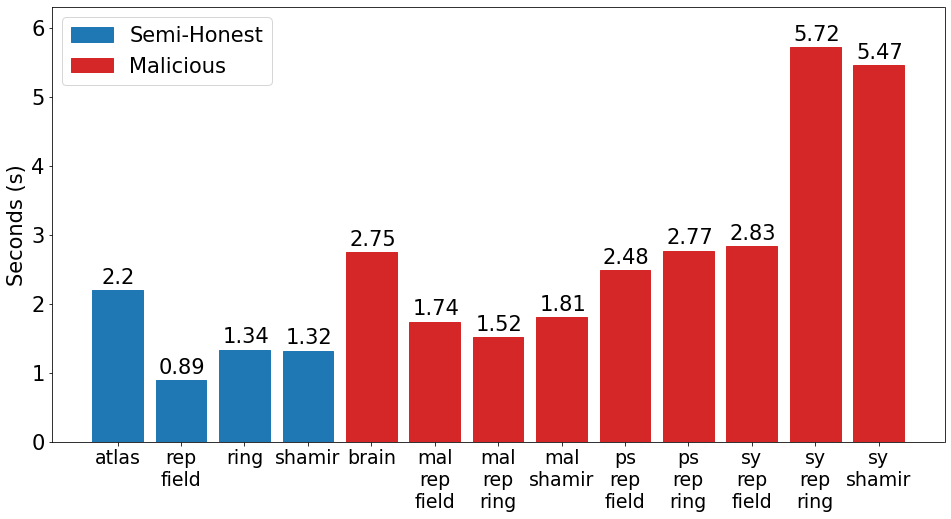

In [67]:
protocols = sorted(['brain','ps-rep-ring','sy-rep-ring','ps-rep-field','sy-rep-field','atlas','shamir','sy-shamir','mal-rep-ring','rep-field','mal-rep-field','mal-shamir','ring'])
#0=semi-honest 1=malicious
sec_guarantee = {'brain':1,'ps-rep-ring':1,'sy-rep-ring':1,'ps-rep-field':1,'ring':0,'rep-field':0,'atlas':0,'shamir':0,'sy-rep-field':1,'sy-shamir':1,'mal-rep-ring':1,'mal-rep-field':1,'mal-shamir':1}

time_dict = {}
data_dict = {}
rounds_dict = {}
for protocol in protocols:
    with open(f'./data_qp/{protocol}_time.csv') as time_file:
        data = [float(x) for x in time_file.readline().split(',')[:-1]]
        time_dict[protocol] = mean(data)
print(time_dict)

#order everything nicely
semi_honest_data = []
semi_honest_label = []
mal_data = []
mal_labels = []
for protocol in protocols:
    if sec_guarantee[protocol]==0:
        #means we are semi-honest
        semi_honest_data.append(time_dict[protocol])
        semi_honest_label.append(protocol)
    else:
        mal_data.append(time_dict[protocol])
        mal_labels.append(protocol)

plt.figure(figsize=(16, 8))
# Make the plot
height = semi_honest_data + mal_data
labels = semi_honest_label + mal_labels
# print(height)
# print(labels)
i=0
for label in labels:
    labels[i] = label.replace('-','\n')
    i += 1
barlist = plt.bar(labels, height);
for i in range(len(semi_honest_data)):
    barlist[i].set_color('tab:blue')
for i in range(len(semi_honest_data),len(labels)):
    barlist[i].set_color('tab:red')

##legend
blue_patch = mpatches.Patch(color='tab:blue', label='Semi-Honest')
red_patch = mpatches.Patch(color='tab:red', label='Malicious')
plt.legend(handles=[blue_patch, red_patch],fontsize=text_size+8)

plt.ylabel('Seconds (s)',fontsize=text_size+8)
plt.xticks(fontsize=text_size+6)
plt.yticks(fontsize=text_size+8)
plt.ylim(0,plt.gca().get_ylim()[1]+plt.gca().get_ylim()[1]*0.05)

#text over bars
for i in range(len(labels)):
        left_shift = (0.087*len(str(round(height[i],2))))
        up_shift = plt.gca().get_ylim()[1]*0.015
        plt.text(i-left_shift,height[i]+ up_shift,round(height[i],2),fontsize=text_size+8)

plt.savefig('./figures/qp_honest_majority_time_bar.pdf',bbox_inches='tight')

{'atlas': 2241.6666666666665, 'brain': 1950.0, 'mal-rep-field': 1803.0, 'mal-rep-ring': 1820.0, 'mal-shamir': 1169.0, 'ps-rep-field': 3014.0, 'ps-rep-ring': 4624.0, 'rep-field': 1105.4444444444443, 'ring': 2109.3333333333335, 'shamir': 1213.7142857142858, 'sy-rep-field': 2861.0, 'sy-rep-ring': 1032.0, 'sy-shamir': 3209.0}


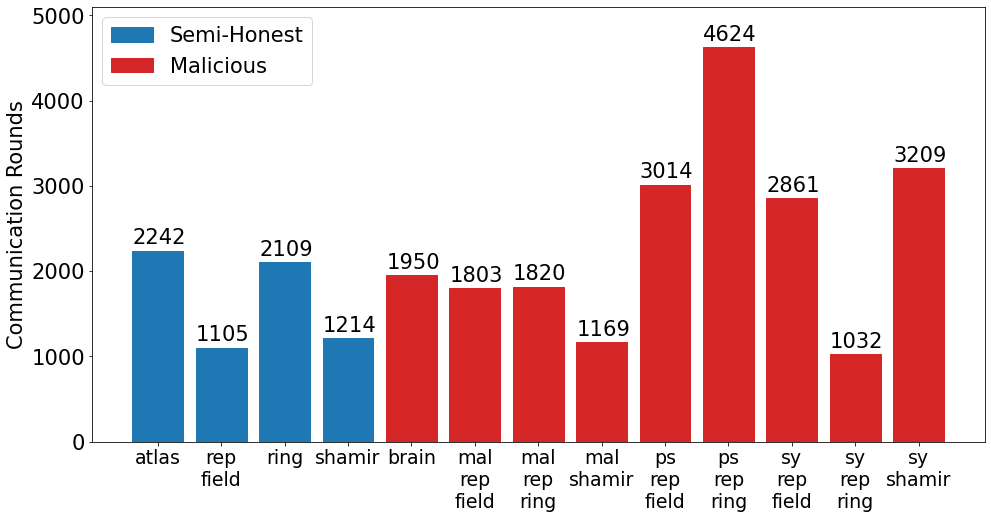

In [66]:
protocols = sorted(['brain','ps-rep-ring','sy-rep-ring','ps-rep-field','sy-rep-field','atlas','shamir','sy-shamir','mal-rep-ring','rep-field','mal-rep-field','mal-shamir','ring'])
#0=semi-honest 1=malicious
sec_guarantee = {'brain':1,'ps-rep-ring':1,'sy-rep-ring':1,'ps-rep-field':1,'ring':0,'rep-field':0,'atlas':0,'shamir':0,'sy-rep-field':1,'sy-shamir':1,'mal-rep-ring':1,'mal-rep-field':1,'mal-shamir':1}

time_dict = {}
data_dict = {}
rounds_dict = {}
for protocol in protocols:
    with open(f'./data_qp/{protocol}_rounds.csv') as time_file:
        data = [float(x) for x in time_file.readline().split(',')[:-1]]
        time_dict[protocol] = mean(data)
print(time_dict)

#order everything nicely
semi_honest_data = []
semi_honest_label = []
mal_data = []
mal_labels = []
for protocol in protocols:
    if sec_guarantee[protocol]==0:
        #means we are semi-honest
        semi_honest_data.append(time_dict[protocol])
        semi_honest_label.append(protocol)
    else:
        mal_data.append(time_dict[protocol])
        mal_labels.append(protocol)

plt.figure(figsize=(16, 8))
# Make the plot
height = semi_honest_data + mal_data
labels = semi_honest_label + mal_labels
# print(height)
# print(labels)
i=0
for label in labels:
    labels[i] = label.replace('-','\n')
    i += 1
barlist = plt.bar(labels, height);
for i in range(len(semi_honest_data)):
    barlist[i].set_color('tab:blue')
for i in range(len(semi_honest_data),len(labels)):
    barlist[i].set_color('tab:red')

##legend
blue_patch = mpatches.Patch(color='tab:blue', label='Semi-Honest')
red_patch = mpatches.Patch(color='tab:red', label='Malicious')
plt.legend(handles=[blue_patch, red_patch],fontsize=text_size+8,loc='upper left')

plt.ylabel('Communication Rounds',fontsize=text_size+8)
plt.xticks(fontsize=text_size+6)
plt.yticks(fontsize=text_size+8)
plt.ylim(0,plt.gca().get_ylim()[1]+plt.gca().get_ylim()[1]*0.05)

#text over bars
for i in range(len(labels)):
        left_shift = (0.099*len(str(round(height[i]))))
        up_shift = plt.gca().get_ylim()[1]*0.015
        plt.text(i-left_shift,height[i]+ up_shift,round(height[i]),fontsize=text_size+8)

plt.savefig('./figures/qp_honest_majority_rounds_bar.pdf',bbox_inches='tight')

{'atlas': 18.8692, 'brain': 38.6323, 'mal-rep-field': 13.2333, 'mal-rep-ring': 7.00797, 'mal-shamir': 26.5767, 'ps-rep-field': 12.5788, 'ps-rep-ring': 7.86334, 'rep-field': 0.59827, 'ring': 0.09596, 'shamir': 5.47243, 'sy-rep-field': 15.1741, 'sy-rep-ring': 16.6666, 'sy-shamir': 33.5818}


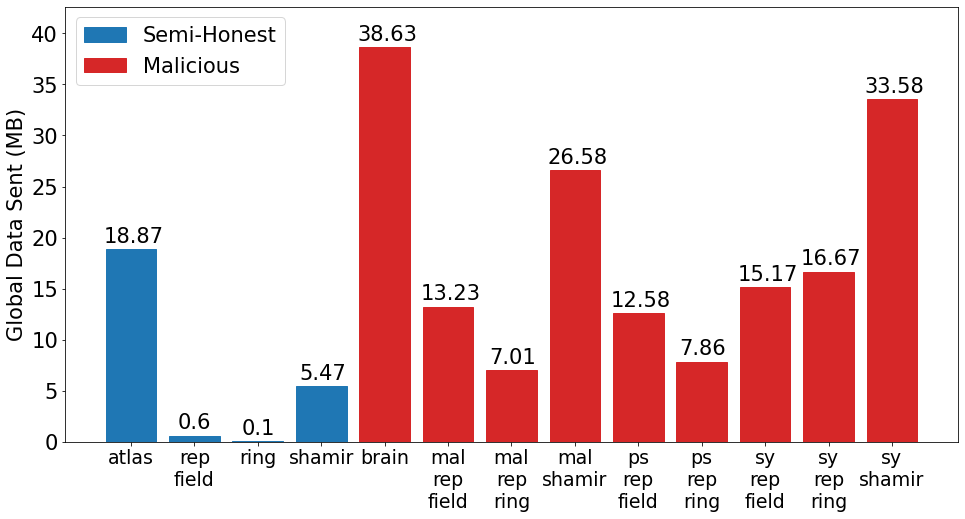

In [68]:
protocols = sorted(['brain','ps-rep-ring','sy-rep-ring','ps-rep-field','sy-rep-field','atlas','shamir','sy-shamir','mal-rep-ring','rep-field','mal-rep-field','mal-shamir','ring'])
#0=semi-honest 1=malicious
sec_guarantee = {'brain':1,'ps-rep-ring':1,'sy-rep-ring':1,'ps-rep-field':1,'ring':0,'rep-field':0,'atlas':0,'shamir':0,'sy-rep-field':1,'sy-shamir':1,'mal-rep-ring':1,'mal-rep-field':1,'mal-shamir':1}

time_dict = {}
data_dict = {}
rounds_dict = {}
for protocol in protocols:
    with open(f'./data_qp/{protocol}_data.csv') as time_file:
        data = [float(x) for x in time_file.readline().split(',')[:-1]]
        time_dict[protocol] = mean(data)
print(time_dict)

#order everything nicely
semi_honest_data = []
semi_honest_label = []
mal_data = []
mal_labels = []
for protocol in protocols:
    if sec_guarantee[protocol]==0:
        #means we are semi-honest
        semi_honest_data.append(time_dict[protocol])
        semi_honest_label.append(protocol)
    else:
        mal_data.append(time_dict[protocol])
        mal_labels.append(protocol)

plt.figure(figsize=(16, 8))
# Make the plot
height = semi_honest_data + mal_data
labels = semi_honest_label + mal_labels
# print(height)
# print(labels)
i=0
for label in labels:
    labels[i] = label.replace('-','\n')
    i += 1
barlist = plt.bar(labels, height);
for i in range(len(semi_honest_data)):
    barlist[i].set_color('tab:blue')
for i in range(len(semi_honest_data),len(labels)):
    barlist[i].set_color('tab:red')

##legend
blue_patch = mpatches.Patch(color='tab:blue', label='Semi-Honest')
red_patch = mpatches.Patch(color='tab:red', label='Malicious')
plt.legend(handles=[blue_patch, red_patch],fontsize=text_size+8,loc='upper left')

plt.ylabel('Global Data Sent (MB)',fontsize=text_size+8)
plt.xticks(fontsize=text_size+6)
plt.yticks(fontsize=text_size+8)
plt.ylim(0,plt.gca().get_ylim()[1]+plt.gca().get_ylim()[1]*0.05)

#text over bars
for i in range(len(labels)):
        left_shift = (0.087*len(str(round(height[i],2))))
        up_shift = plt.gca().get_ylim()[1]*0.015
        plt.text(i-left_shift,height[i]+ up_shift,round(height[i],2),fontsize=text_size+8)

plt.savefig('./figures/qp_honest_majority_data_bar.pdf',bbox_inches='tight')

### Dishonest Majority -- QP

{'hemi': [7.00133, 6.71128, 7.13506, 1.63617, 6.79416, 7.07916, 6.77534], 'mama': [899.253, 899.263, 898.592, 899.09, 898.867], 'mascot': [519.965, 520.327, 520.13, 520.331, 519.856, 520.915, 520.651, 520.644, 520.79], 'semi': [15.9057, 15.9164, 16.0145, 16.1394, 15.9282, 15.9395, 15.8991, 15.9686], 'soho': [14.7189, 14.681, 14.6921, 14.6921, 14.7323, 14.733], 'spdz2k': [530.474, 530.045, 529.514, 531.554, 529.44, 529.338, 529.791, 530.279, 530.111], 'temi': [11.68, 11.686, 11.7621, 11.7984, 11.7775, 11.7137, 11.7167, 11.8268, 11.6441]}


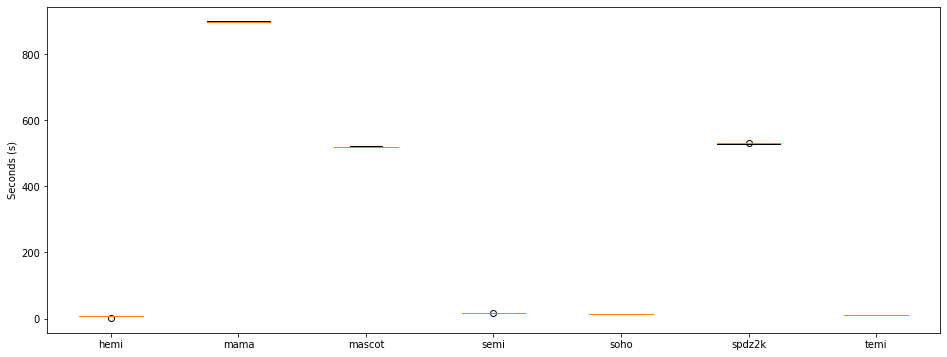

In [78]:
protocols = sorted(['semi','hemi','temi','soho','mascot','mama','spdz2k'])

time_dict = {}
data_dict = {}
rounds_dict = {}
for protocol in protocols:
    with open(f'./data_qp/{protocol}_time.csv') as time_file:
        data = [float(x) for x in time_file.readline().split(',')[:-1]]
        time_dict[protocol] = data
print(time_dict)

plt.figure(figsize=(16, 6))
plt.boxplot(time_dict.values(),labels=time_dict.keys());
plt.ylabel('Seconds (s)')

plt.savefig('./figures/qp_dishonest_majority_time.pdf')

{'hemi': 6.161785714285714, 'mama': 899.013, 'mascot': 520.401, 'semi': 15.963925, 'soho': 14.708233333333332, 'spdz2k': 530.0606666666666, 'temi': 11.733922222222223}


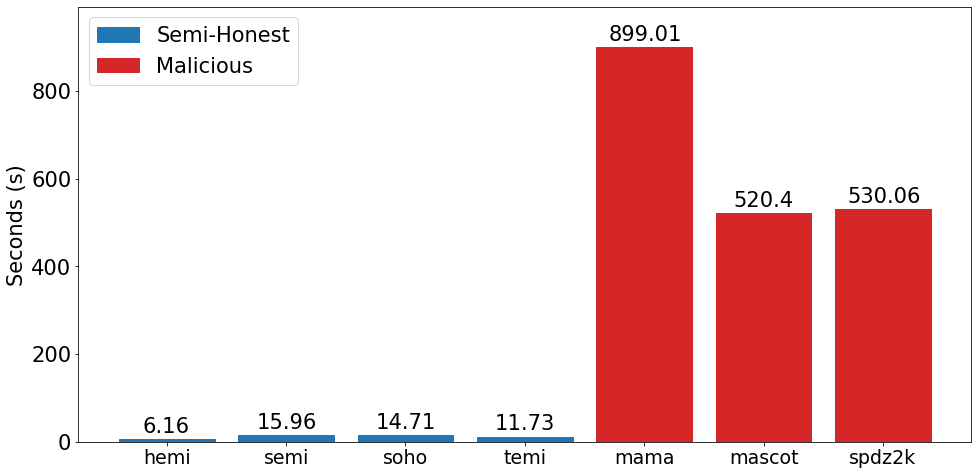

In [64]:
protocols = sorted(['semi','hemi','temi','soho','mascot','mama','spdz2k'])
#0=semi-honest 1=malicious
sec_guarantee = {'mascot':1,'mama':1,'spdz2k':1,'semi':0,'hemi':0,'temi':0,'soho':0}

time_dict = {}
data_dict = {}
rounds_dict = {}
for protocol in protocols:
    with open(f'./data_qp/{protocol}_time.csv') as time_file:
        data = [float(x) for x in time_file.readline().split(',')[:-1]]
        time_dict[protocol] = mean(data)
print(time_dict)

#order everything nicely
semi_honest_data = []
semi_honest_label = []
mal_data = []
mal_labels = []
for protocol in protocols:
    if sec_guarantee[protocol]==0:
        #means we are semi-honest
        semi_honest_data.append(time_dict[protocol])
        semi_honest_label.append(protocol)
    else:
        mal_data.append(time_dict[protocol])
        mal_labels.append(protocol)

plt.figure(figsize=(16, 8))
# Make the plot
height = semi_honest_data + mal_data
labels = semi_honest_label + mal_labels
# print(height)
# print(labels)
barlist = plt.bar(labels, height);
for i in range(len(semi_honest_data)):
    barlist[i].set_color('tab:blue')
for i in range(len(semi_honest_data),len(labels)):
    barlist[i].set_color('tab:red')

##legend
blue_patch = mpatches.Patch(color='tab:blue', label='Semi-Honest')
red_patch = mpatches.Patch(color='tab:red', label='Malicious')
plt.legend(handles=[blue_patch, red_patch],fontsize=text_size+8,loc='upper left')

plt.ylabel('Seconds (s)',fontsize=text_size+8)
plt.xticks(fontsize=text_size+6)
plt.yticks(fontsize=text_size+8)
plt.ylim(0,plt.gca().get_ylim()[1]+plt.gca().get_ylim()[1]*0.05)

#text over bars
for i in range(len(labels)):
        left_shift = (0.05*len(str(round(height[i],2))))
        up_shift = plt.gca().get_ylim()[1]*0.015
        plt.text(i-left_shift,height[i]+ up_shift,round(height[i],2),fontsize=text_size+8)

plt.savefig('./figures/qp_dishonest_majority_time_bar.pdf',bbox_inches='tight')

{'hemi': 2020.9471428571428, 'mama': 7330.0, 'mascot': 5658.777777777777, 'semi': 2430.0, 'soho': 2356.0, 'spdz2k': 6659.9, 'temi': 2551.0}


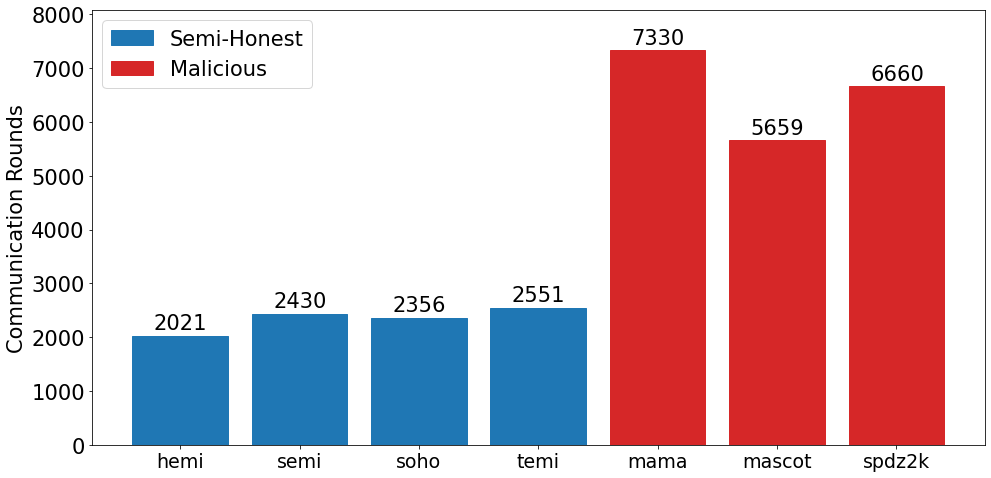

In [63]:
protocols = sorted(['semi','hemi','temi','soho','mascot','mama','spdz2k'])
#0=semi-honest 1=malicious
sec_guarantee = {'mascot':1,'mama':1,'spdz2k':1,'semi':0,'hemi':0,'temi':0,'soho':0}

time_dict = {}
data_dict = {}
rounds_dict = {}
for protocol in protocols:
    with open(f'./data_qp/{protocol}_rounds.csv') as time_file:
        data = [float(x) for x in time_file.readline().split(',')[:-1]]
        time_dict[protocol] = mean(data)
print(time_dict)

#order everything nicely
semi_honest_data = []
semi_honest_label = []
mal_data = []
mal_labels = []
for protocol in protocols:
    if sec_guarantee[protocol]==0:
        #means we are semi-honest
        semi_honest_data.append(time_dict[protocol])
        semi_honest_label.append(protocol)
    else:
        mal_data.append(time_dict[protocol])
        mal_labels.append(protocol)

plt.figure(figsize=(16, 8))
# Make the plot
height = semi_honest_data + mal_data
labels = semi_honest_label + mal_labels
# print(height)
# print(labels)
barlist = plt.bar(labels, height);
for i in range(len(semi_honest_data)):
    barlist[i].set_color('tab:blue')
for i in range(len(semi_honest_data),len(labels)):
    barlist[i].set_color('tab:red')

##legend
blue_patch = mpatches.Patch(color='tab:blue', label='Semi-Honest')
red_patch = mpatches.Patch(color='tab:red', label='Malicious')
plt.legend(handles=[blue_patch, red_patch],fontsize=text_size+8,loc='upper left')

plt.ylabel('Communication Rounds',fontsize=text_size+8)
plt.xticks(fontsize=text_size+6)
plt.yticks(fontsize=text_size+8)
plt.ylim(0,plt.gca().get_ylim()[1]+plt.gca().get_ylim()[1]*0.05)

#text over bars
for i in range(len(labels)):
        left_shift = (0.055*len(str(round(height[i]))))
        up_shift = plt.gca().get_ylim()[1]*0.015
        plt.text(i-left_shift,height[i]+ up_shift,round(height[i]),fontsize=text_size+8)

plt.savefig('./figures/qp_dishonest_majority_rounds_bar.pdf',bbox_inches='tight')

{'hemi': 24.8931, 'mama': 4478.36, 'mascot': 2802.43, 'semi': 50.9838, 'soho': 34.993325999999996, 'spdz2k': 1792.33, 'temi': 63.48951}


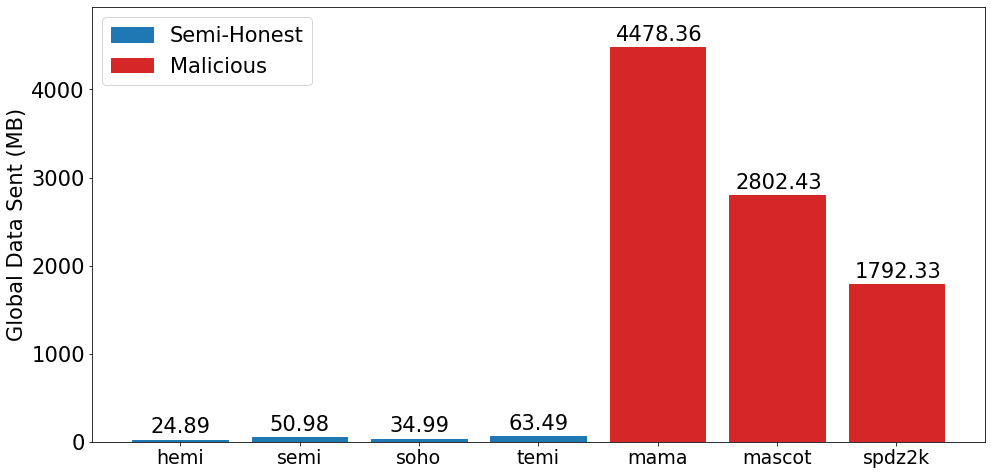

In [62]:
protocols = sorted(['semi','hemi','temi','soho','mascot','mama','spdz2k'])
#0=semi-honest 1=malicious
sec_guarantee = {'mascot':1,'mama':1,'spdz2k':1,'semi':0,'hemi':0,'temi':0,'soho':0}

time_dict = {}
data_dict = {}
rounds_dict = {}
for protocol in protocols:
    with open(f'./data_qp/{protocol}_data.csv') as time_file:
        data = [float(x) for x in time_file.readline().split(',')[:-1]]
        time_dict[protocol] = mean(data)
print(time_dict)

#order everything nicely
semi_honest_data = []
semi_honest_label = []
mal_data = []
mal_labels = []
for protocol in protocols:
    if sec_guarantee[protocol]==0:
        #means we are semi-honest
        semi_honest_data.append(time_dict[protocol])
        semi_honest_label.append(protocol)
    else:
        mal_data.append(time_dict[protocol])
        mal_labels.append(protocol)

plt.figure(figsize=(16, 8))
# Make the plot
height = semi_honest_data + mal_data
labels = semi_honest_label + mal_labels
# print(height)
# print(labels)
barlist = plt.bar(labels, height);
for i in range(len(semi_honest_data)):
    barlist[i].set_color('tab:blue')
for i in range(len(semi_honest_data),len(labels)):
    barlist[i].set_color('tab:red')

##legend
blue_patch = mpatches.Patch(color='tab:blue', label='Semi-Honest')
red_patch = mpatches.Patch(color='tab:red', label='Malicious')
plt.legend(handles=[blue_patch, red_patch],fontsize=text_size+8,loc='upper left')

plt.ylabel('Global Data Sent (MB)',fontsize=text_size+8)
plt.xticks(fontsize=text_size+6)
plt.yticks(fontsize=text_size+8)
plt.ylim(0,plt.gca().get_ylim()[1]+plt.gca().get_ylim()[1]*0.05)

#text over bars
for i in range(len(labels)):
        left_shift = (0.05*len(str(round(height[i],2))))
        up_shift = plt.gca().get_ylim()[1]*0.015
        plt.text(i-left_shift,height[i]+ up_shift,round(height[i],2),fontsize=text_size+8)

plt.savefig('./figures/qp_dishonest_majority_data_bar.pdf',bbox_inches='tight')

### Dishonest Majority -- AFP

{'hemi': [1.18639, 1.09137, 1.12647, 1.08256, 1.08822], 'mama': [410.545, 410.423, 410.235, 409.685, 409.72, 409.236, 409.733, 409.973], 'mascot': [232.692, 232.556, 233.546, 233.159, 232.959, 233.125, 232.902, 233.76, 233.37, 232.983], 'semi': [6.30162, 6.1388, 6.23172, 6.2758, 6.24766, 6.11917, 6.24766, 6.09313, 6.17008], 'soho': [8.6537, 8.67244, 8.58586, 8.57973, 8.59366, 8.57922, 8.54204, 8.55118, 8.61405], 'spdz2k': [246.525, 246.818, 246.701], 'temi': [3.20759, 3.22175, 3.19765, 3.19742, 3.14935, 3.21101]}


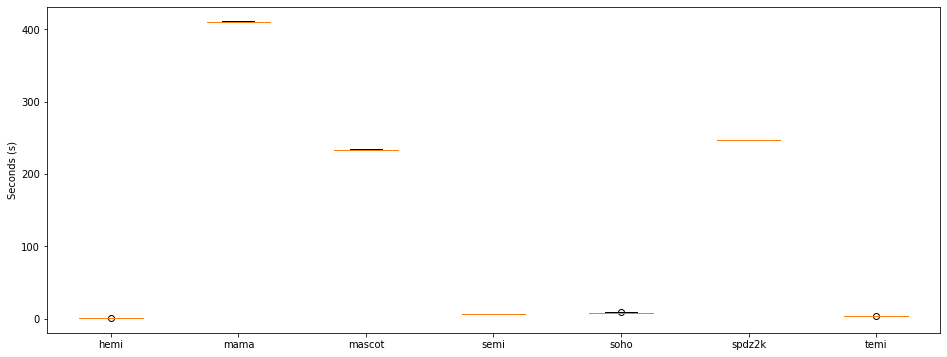

In [72]:
protocols = sorted(['semi','hemi','temi','soho','mascot','mama','spdz2k'])

time_dict = {}
data_dict = {}
rounds_dict = {}
for protocol in protocols:
    with open(f'./data_apf_2/{protocol}_time.csv') as time_file:
        data = [float(x) for x in time_file.readline().split(',')[:-1]]
        time_dict[protocol] = data
print(time_dict)

plt.figure(figsize=(16, 6))
plt.boxplot(time_dict.values(),labels=time_dict.keys());
plt.ylabel('Seconds (s)')

plt.savefig('./figures/afp_dishonest_majority_time.pdf')

{'hemi': 1.115002, 'mama': 409.94375, 'mascot': 233.1052, 'semi': 6.202848888888889, 'semi2k': 0.6162722222222222, 'soho': 8.596875555555556, 'spdz2k': 246.68133333333333, 'temi': 3.197461666666667}


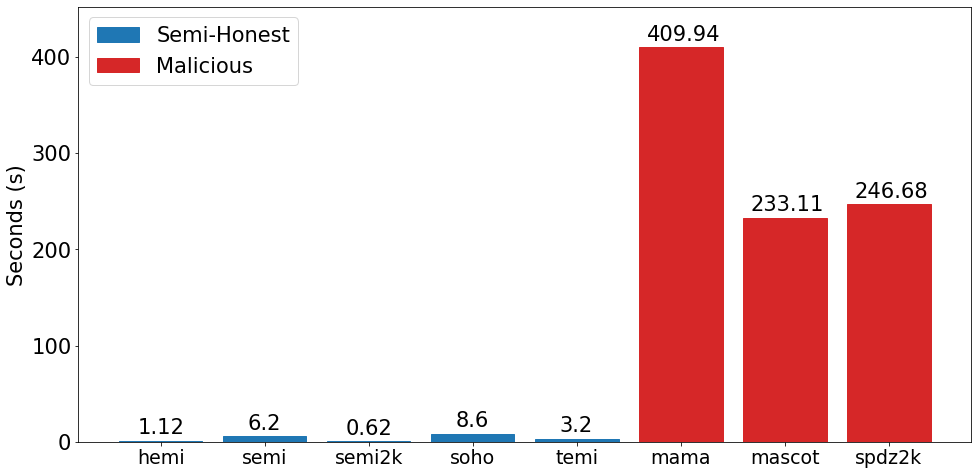

In [73]:
protocols = sorted(['semi','hemi','temi','soho','mascot','mama','spdz2k','semi2k'])
#0=semi-honest 1=malicious
sec_guarantee = {'mascot':1,'mama':1,'spdz2k':1,'semi':0,'hemi':0,'temi':0,'soho':0,'semi2k':0}

time_dict = {}
data_dict = {}
rounds_dict = {}
for protocol in protocols:
    with open(f'./data_apf_2/{protocol}_time.csv') as time_file:
        data = [float(x) for x in time_file.readline().split(',')[:-1]]
        time_dict[protocol] = mean(data)
print(time_dict)

#order everything nicely
semi_honest_data = []
semi_honest_label = []
mal_data = []
mal_labels = []
for protocol in protocols:
    if sec_guarantee[protocol]==0:
        #means we are semi-honest
        semi_honest_data.append(time_dict[protocol])
        semi_honest_label.append(protocol)
    else:
        mal_data.append(time_dict[protocol])
        mal_labels.append(protocol)

plt.figure(figsize=(16, 8))
# Make the plot
height = semi_honest_data + mal_data
labels = semi_honest_label + mal_labels
# print(height)
# print(labels)
barlist = plt.bar(labels, height);
for i in range(len(semi_honest_data)):
    barlist[i].set_color('tab:blue')
for i in range(len(semi_honest_data),len(labels)):
    barlist[i].set_color('tab:red')

##legend
blue_patch = mpatches.Patch(color='tab:blue', label='Semi-Honest')
red_patch = mpatches.Patch(color='tab:red', label='Malicious')
plt.legend(handles=[blue_patch, red_patch],fontsize=text_size+8,loc='upper left')

plt.ylabel('Seconds (s)',fontsize=text_size+8)
plt.xticks(fontsize=text_size+6)
plt.yticks(fontsize=text_size+8)
plt.ylim(0,plt.gca().get_ylim()[1]+plt.gca().get_ylim()[1]*0.05)

#text over bars
for i in range(len(labels)):
        left_shift = (0.055*len(str(round(height[i],2))))
        up_shift = plt.gca().get_ylim()[1]*0.015
        plt.text(i-left_shift,height[i]+ up_shift,round(height[i],2),fontsize=text_size+8)

plt.savefig('./figures/apf_dishonest_majority_time_bar.pdf',bbox_inches='tight')

{'hemi': 541.6, 'mama': 2406.0, 'mascot': 1652.0, 'semi': 583.0, 'semi2k': 686.0, 'soho': 542.0, 'spdz2k': 1916.3333333333333, 'temi': 615.0}


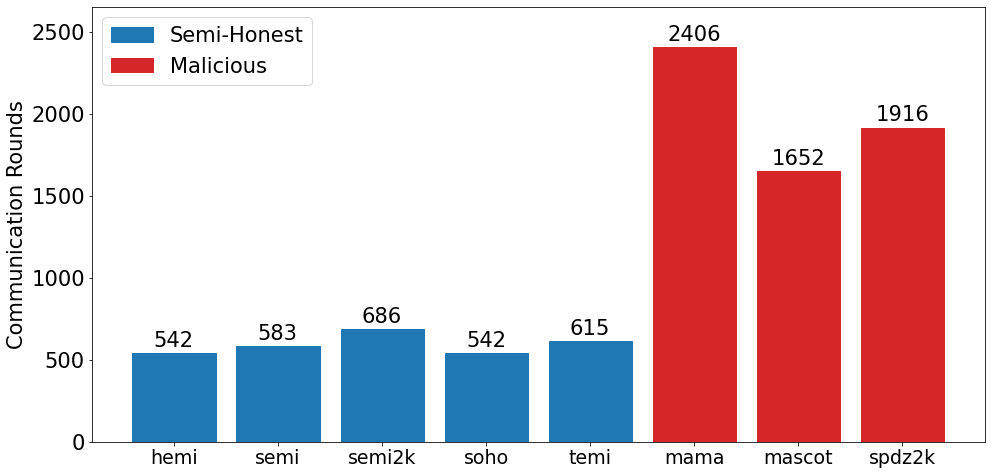

In [75]:
protocols = sorted(['semi','hemi','temi','soho','mascot','mama','spdz2k','semi2k'])
#0=semi-honest 1=malicious
sec_guarantee = {'mascot':1,'mama':1,'spdz2k':1,'semi':0,'hemi':0,'temi':0,'soho':0,'semi2k':0}

time_dict = {}
data_dict = {}
rounds_dict = {}
for protocol in protocols:
    with open(f'./data_apf_2/{protocol}_rounds.csv') as time_file:
        data = [float(x) for x in time_file.readline().split(',')[:-1]]
        time_dict[protocol] = mean(data)
print(time_dict)

#order everything nicely
semi_honest_data = []
semi_honest_label = []
mal_data = []
mal_labels = []
for protocol in protocols:
    if sec_guarantee[protocol]==0:
        #means we are semi-honest
        semi_honest_data.append(time_dict[protocol])
        semi_honest_label.append(protocol)
    else:
        mal_data.append(time_dict[protocol])
        mal_labels.append(protocol)

plt.figure(figsize=(16, 8))
# Make the plot
height = semi_honest_data + mal_data
labels = semi_honest_label + mal_labels
# print(height)
# print(labels)
barlist = plt.bar(labels, height);
for i in range(len(semi_honest_data)):
    barlist[i].set_color('tab:blue')
for i in range(len(semi_honest_data),len(labels)):
    barlist[i].set_color('tab:red')

##legend
blue_patch = mpatches.Patch(color='tab:blue', label='Semi-Honest')
red_patch = mpatches.Patch(color='tab:red', label='Malicious')
plt.legend(handles=[blue_patch, red_patch],fontsize=text_size+8,loc='upper left')

plt.ylabel('Communication Rounds',fontsize=text_size+8)
plt.xticks(fontsize=text_size+6)
plt.yticks(fontsize=text_size+8)
plt.ylim(0,plt.gca().get_ylim()[1]+plt.gca().get_ylim()[1]*0.05)

#text over bars
for i in range(len(labels)):
        left_shift = (0.065*len(str(round(height[i]))))
        up_shift = plt.gca().get_ylim()[1]*0.015
        plt.text(i-left_shift,height[i]+ up_shift,round(height[i]),fontsize=text_size+8)

plt.savefig('./figures/apf_dishonest_majority_rounds_bar.pdf',bbox_inches='tight')

{'hemi': 4.42441, 'mama': 2033.74, 'mascot': 1251.84, 'semi': 20.2508, 'semi2k': 1.29354, 'soho': 24.613533333333333, 'spdz2k': 819.548, 'temi': 17.78}


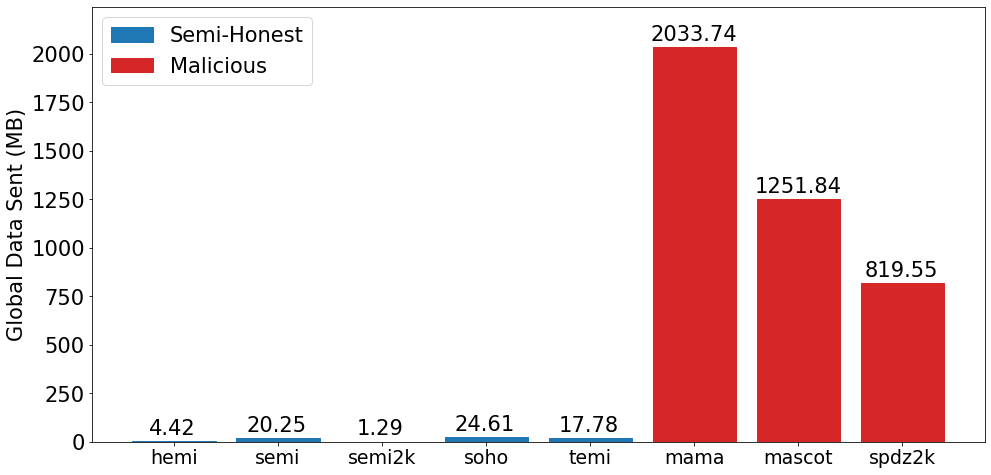

In [76]:
protocols = sorted(['semi','hemi','temi','soho','mascot','mama','spdz2k','semi2k'])
#0=semi-honest 1=malicious
sec_guarantee = {'mascot':1,'mama':1,'spdz2k':1,'semi':0,'hemi':0,'temi':0,'soho':0,'semi2k':0}

time_dict = {}
data_dict = {}
rounds_dict = {}
for protocol in protocols:
    with open(f'./data_apf_2/{protocol}_data.csv') as time_file:
        data = [float(x) for x in time_file.readline().split(',')[:-1]]
        time_dict[protocol] = mean(data)
print(time_dict)

#order everything nicely
semi_honest_data = []
semi_honest_label = []
mal_data = []
mal_labels = []
for protocol in protocols:
    if sec_guarantee[protocol]==0:
        #means we are semi-honest
        semi_honest_data.append(time_dict[protocol])
        semi_honest_label.append(protocol)
    else:
        mal_data.append(time_dict[protocol])
        mal_labels.append(protocol)

plt.figure(figsize=(16, 8))
# Make the plot
height = semi_honest_data + mal_data
labels = semi_honest_label + mal_labels
# print(height)
# print(labels)
barlist = plt.bar(labels, height);
for i in range(len(semi_honest_data)):
    barlist[i].set_color('tab:blue')
for i in range(len(semi_honest_data),len(labels)):
    barlist[i].set_color('tab:red')

##legend
blue_patch = mpatches.Patch(color='tab:blue', label='Semi-Honest')
red_patch = mpatches.Patch(color='tab:red', label='Malicious')
plt.legend(handles=[blue_patch, red_patch],fontsize=text_size+8,loc='upper left')

plt.ylabel('Global Data Sent (MB)',fontsize=text_size+8)
plt.xticks(fontsize=text_size+6)
plt.yticks(fontsize=text_size+8)
plt.ylim(0,plt.gca().get_ylim()[1]+plt.gca().get_ylim()[1]*0.05)

#text over bars
for i in range(len(labels)):
        left_shift = (0.06*len(str(round(height[i],2))))
        up_shift = plt.gca().get_ylim()[1]*0.015
        plt.text(i-left_shift,height[i]+ up_shift,round(height[i],2),fontsize=text_size+8)

plt.savefig('./figures/apf_dishonest_majority_data_bar.pdf',bbox_inches='tight')